# Testing our Data Infrastructure.

In this notebook, we test that the Data library is working as proposed. When we call get pricing on a list of symbols or a singleton symbol a Pandas Datafram or Series should be returned respectively.

In [1]:
import time
import datetime
import random
import json

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt

import scraper
from retrieve_data import get_pricing


ValueError: The AlphaVantage API key must be provided either through the key parameter or through the environment variable ALPHAVANTAGE_API_KEY. Get a free key from the alphavantage website: https://www.alphavantage.co/support/#api-key

We can load the dictionaries that take Industries and Sectors to their S&P500 constituent stocks from our json file that was generated using the scraper.py 

In [14]:
# with open('industry_to_stocks') as f:
#     industry_to_stocks = json.load(f)

# with open('sector_to_stocks') as f:
#     sector_to_stocks = json.load(f)

If this is out-of-date, uncomment and use the following:

In [ ]:
# sp500 = scraper.sp500
# industry_to_stocks, sector_to_stocks = scraper.generate_industry_sector_YF(stocks)



# You can use the following code to store these dictionaries as JSON files for future use and import them using
# the code in the cell above.

# with open('sector_to_stocks', 'w') as f:
#     json.dump(sector_to_stocks, f)

# with open('industry_to_stocks', 'w') as f:
#     json.dump(industry_to_stocks, f)

We will now test that our retrieval and storage system works. The airlines data is already in my database and so the system should print that it is retrieving the data from there.

In [17]:
start_date = "2016-01-01"
end_date = "2016-12-31"
airlines = sector_to_stocks["Airlines"]
print(airlines)

['ALK', 'AAL', 'DAL', 'UAL']


In [18]:
prices_2016 = get_pricing(airlines, start_date, end_date)
prices_2016.head()

From db: ALK
From db: AAL
From db: DAL
From db: UAL


,ALK,AAL,DAL,UAL
date,,,,
2016-01-04,72.5140,39.0926,44.2305,55.61
2016-01-05,71.3024,38.7199,44.1487,55.06
2016-01-06,72.3291,39.3984,44.4759,55.20
2016-01-07,68.4351,38.6530,42.7216,52.63
2016-01-08,65.0962,38.5766,42.3671,51.89


In [ ]:
prices_2016.plot()
plot.legend()

Now, we test that the function can accept singletons and can download and store new data. Note that if we call get_pricing twice on the same symbol, it now retrieves the desired data from the database.

In [20]:
Citi = get_pricing("C", start_date, end_date)

In [23]:
Citi = get_pricing("C", start_date, end_date)
Citi.head()

From db: C


,C
date,
2016-01-04,47.1871
2016-01-05,46.9379
2016-01-06,46.2550
2016-01-07,43.8924
2016-01-08,42.5727


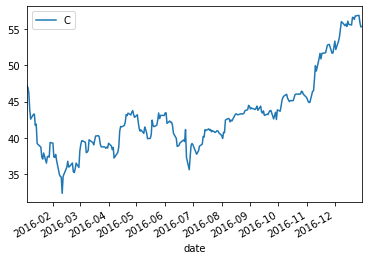

In [24]:
Citi.plot()